# Evaluate

In [2]:
import os
import numpy as np
import sys
import tensorflow as tf
import pandas as pd
import random
import shutil
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from datetime import datetime
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
from detection import load_image_into_numpy_array, run_inference_for_single_image
from helperCV2 import reshapeImg, readImg, saveToFile

repo_path = "/home/michel/Documents/GitHub/CardDetection"

## Faster R-CNN

In [3]:
os.chdir(repo_path)

!python3 src/tensorflow/models/research/object_detection/export_inference_graph.py \
    --input_type image_tensor \
    --pipeline_config_path=samples/training/cfg/train.config \
    --trained_checkpoint_prefix=samples/training/cfg/model.ckpt-67504 \
    --output_directory=samples/training/cfg/

Instructions for updating:
keep_dims is deprecated, use keepdims instead
W1220 06:39:09.232050 139924135057216 tf_logging.py:125] From /home/michel/Documents/GitHub/CardDetection/src/tensorflow/models/research/object_detection/predictors/heads/box_head.py:93: calling reduce_mean (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
W1220 06:39:10.225185 139924135057216 tf_logging.py:125] From /home/michel/Documents/GitHub/CardDetection/src/tensorflow/models/research/object_detection/exporter.py:328: get_or_create_global_step (from tensorflow.contrib.framework.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
Instructions for updating:
Use `tf.profiler.profile(graph, run_meta, op_

273 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          .*BatchNorm.*,.*Initializer.*,.*Regularizer.*,.*BiasAdd.*
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================
Incomplete shape.

Doc:
scope: The nodes in the model graph are organiz

2018-12-20 06:39:12.996965: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


# Validation

/home/michel/Documents/GitHub/CardDetection/samples/training/cfg/frozen_inference_graph.pb
20181127_115245.jpg
(2160, 2160)
20181127_114934.jpg
(2160, 2160)
20181126_103148.jpg
(4128, 3096)
20181127_115236.jpg
(2160, 2160)


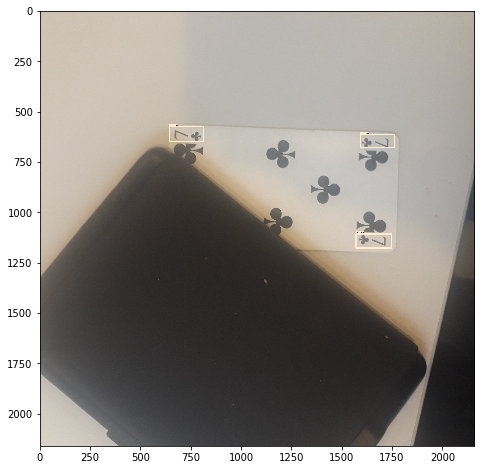

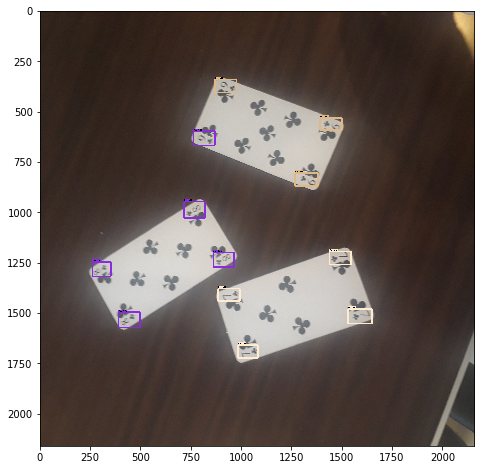

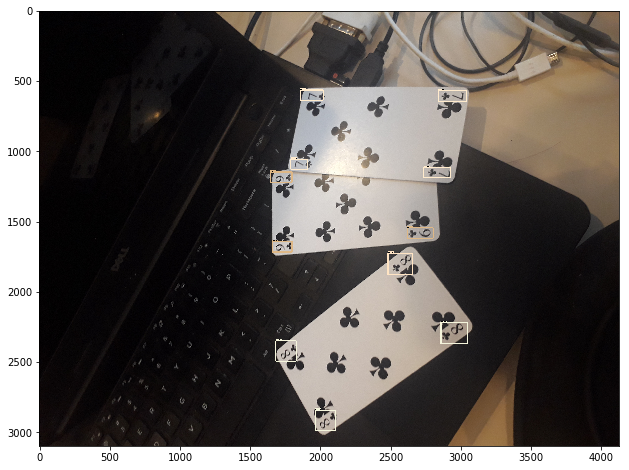

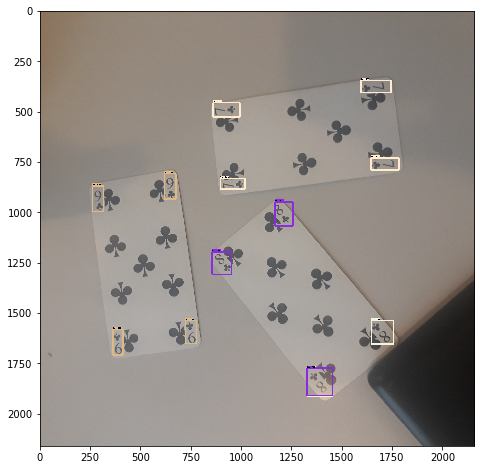

In [9]:
config_path = os.path.join(repo_path, "samples/training/cfg")

pb_path = os.path.join(config_path, "frozen_inference_graph.pb")
valid_dir = os.path.join(repo_path, "data/test")

print(pb_path)

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(pb_path, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

category_index = label_map_util.create_category_index_from_labelmap(os.path.join(config_path, "labelmap.pbtxt"), use_display_name=True)

i = 0
IMAGE_SIZE = (12, 8)
from PIL import Image
for image_path in os.listdir(valid_dir):
    if not image_path.endswith(".jpg"):
        continue
    print(image_path)
    
    image_path = valid_dir + "/" + image_path
    image = Image.open(image_path)
   # image = Image.open("poker.JPG")
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)
    #plt.savefig("image{}.jpg".format(i))

    i += 1
    if i==4: break
